In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_diabetes
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge
from sklearn.preprocessing import PolynomialFeatures

In [58]:
dia = load_diabetes()
print(type(dia))
print(dia.keys())
print(dia.feature_names)

<class 'sklearn.utils.Bunch'>
dict_keys(['data', 'target', 'DESCR', 'feature_names', 'data_filename', 'target_filename'])
['age', 'sex', 'bmi', 'bp', 's1', 's2', 's3', 's4', 's5', 's6']


In [60]:
x=dia.data
y=dia.target

reg=LinearRegression()
lasso_reg=Lasso(alpha=5)
ridge_reg=Ridge(alpha=8)

reg.fit(x,y)
lasso_reg.fit(x,y)
ridge_reg.fit(x,y)

Ridge(alpha=8, copy_X=True, fit_intercept=True, max_iter=None, normalize=False,
      random_state=None, solver='auto', tol=0.001)

In [7]:
for a, b in zip(dia.feature_names, reg.coef_):
    print("%s: %f" %(a,b))

age: -10.012198
sex: -239.819089
bmi: 519.839787
bp: 324.390428
s1: -792.184162
s2: 476.745838
s3: 101.044570
s4: 177.064176
s5: 751.279321
s6: 67.625386


In [8]:
for a, b in zip(dia.feature_names, lasso_reg.coef_):
    print("%s: %f" %(a,b))

age: 0.000000
sex: 0.000000
bmi: 0.000000
bp: 0.000000
s1: 0.000000
s2: 0.000000
s3: -0.000000
s4: 0.000000
s5: 0.000000
s6: 0.000000


In [9]:
for a, b in zip(dia.feature_names, ridge_reg.coef_):
    print("%s: %f" %(a,b))

age: 22.610153
sex: -2.633505
bmi: 89.952381
bp: 65.212511
s1: 22.104073
s2: 14.719635
s3: -55.946923
s4: 55.919623
s5: 83.082478
s6: 51.533239


In [10]:
reg.score(x,y)

0.5177494254132934

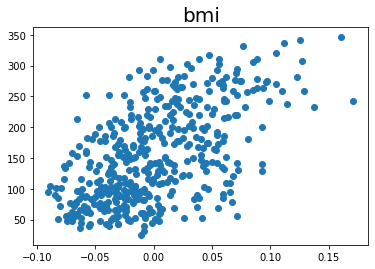

In [12]:
X=[i[2] for i in x]
plt.title('bmi',size=20)
plt.plot(X,y,'o')

In [13]:
model_linear = LinearRegression().fit(dia.data[:,0].reshape(-1,1),dia.target)

Text(0.5, 1.0, 'bmi')

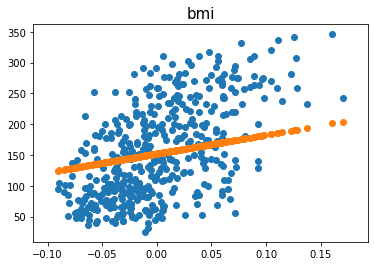

In [15]:
plt.scatter(dia.data[:,2],dia.target)
plt.scatter(dia.data[:,2],model_linear.predict(dia.data[:,2].reshape(-1,1)))
plt.title('bmi',size=15)

In [16]:
model_linear.score(dia.data[:,2].reshape(-1,1),dia.target)

0.18507258360407564

Text(0.5, 1.0, 'bmi')

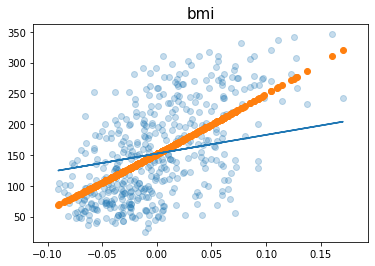

In [53]:
poly_2 = PolynomialFeatures(degree=2)
poly_2_X = poly_2.fit_transform(dia.data[:,2].reshape(-1,1))
 
model_2_poly = LinearRegression().fit(poly_2_X,dia.target)
plt.scatter(dia.data[:,2],dia.target,alpha=0.25)
 
linear_fit = plt.plot(dia.data[:,2], model_linear.predict(dia.data[:,2].reshape(-1,1)))
poly_2_fit = plt.scatter(dia.data[:,2], model_2_poly.predict(poly_2_X))
plt.title('bmi',size=15)

In [19]:
model_2_poly.score(poly_2_X,dia.target)

0.3440509870104119

Text(0.5, 1.0, 'bmi')

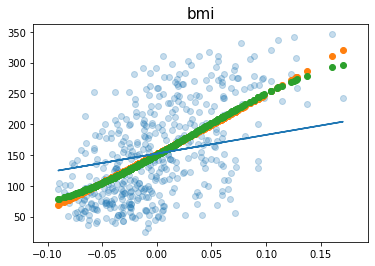

In [54]:
poly_3 = PolynomialFeatures(degree=3)
poly_3_X = poly_3.fit_transform(dia.data[:,2].reshape(-1,1))
 
model_3_poly = LinearRegression().fit(poly_3_X,dia.target)
plt.scatter(dia.data[:,2],dia.target,alpha=0.25)
 
linear_fit = plt.plot(dia.data[:,2], model_linear.predict(dia.data[:,2].reshape(-1,1)))
poly_2_fit = plt.scatter(dia.data[:,2], model_2_poly.predict(poly_2_X))
poly_3_fit = plt.scatter(dia.data[:,2], model_3_poly.predict(poly_3_X))
plt.title('bmi',size=15)

In [21]:
model_3_poly.score(poly_3_X,dia.target)

0.34512199713015446

Text(0.5, 1.0, 'bmi')

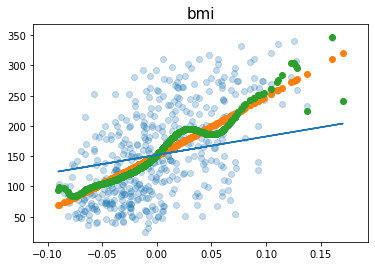

In [55]:
poly_20 = PolynomialFeatures(degree=20)
poly_20_X = poly_20.fit_transform(dia.data[:,2].reshape(-1,1))
 
model_20_poly = LinearRegression().fit(poly_20_X,dia.target)
plt.scatter(dia.data[:,2],dia.target,alpha=0.25)
 
linear_fit = plt.plot(dia.data[:,2], model_linear.predict(dia.data[:,2].reshape(-1,1)))
poly_2_fit = plt.scatter(dia.data[:,2], model_2_poly.predict(poly_2_X))
poly_20_fit = plt.scatter(dia.data[:,2], model_20_poly.predict(poly_10_X))
plt.title('bmi',size=15)

In [57]:
model_20_poly.score(poly_10_X,dia.target)

0.36381270805343835

## degree = 20에서 가장 높은 score가 나온다.
## -> bmi지수에 따른 당뇨병발병률은 20차 함수의 모양과 비례해 증가한다.